## Geometric and intensity transformations, Sobel and Prewit filters

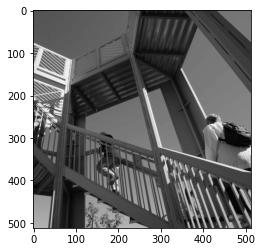

In [1]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import transform

from scipy import ndimage
f = misc.ascent()  # retrieve a grayscale image
imshow(f, cmap=plt.cm.gray)

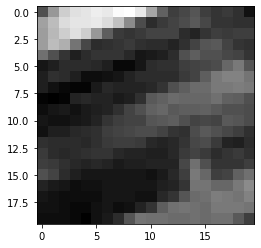

In [2]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest') 

In [3]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshape=False)

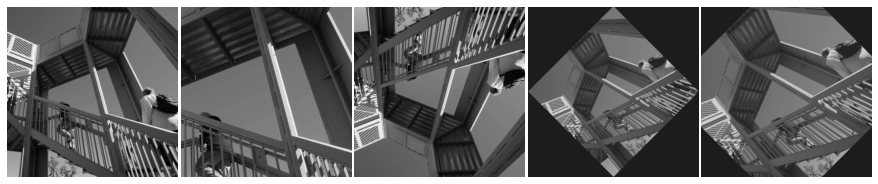

In [4]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

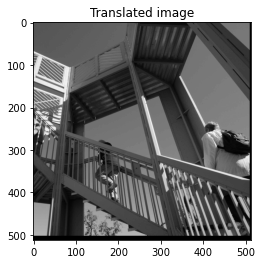

In [5]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

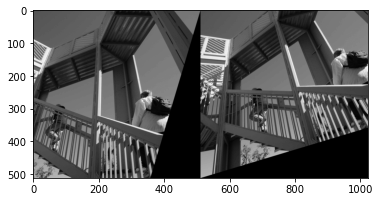

In [6]:
# horizontal
f=f/255.0  # scale to the pixel intensity range (0,1) 
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

### Rescaling

In [7]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

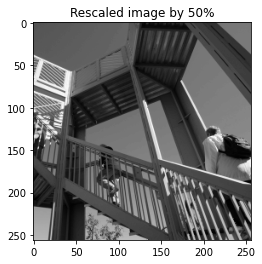

In [8]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing 

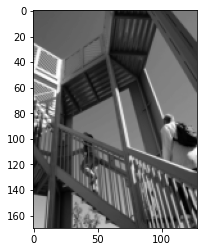

In [9]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

### Rotation with transform.rotate 

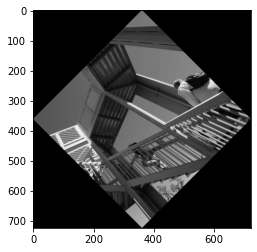

In [10]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


### Question 1:
#### Using Python scimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.
#### Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image. Display the final result.
#### Perform a consequent series of operations on an image f, rotate  an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.  


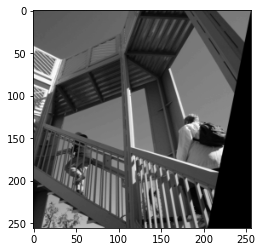

In [22]:
# part 1
# horizontal shear
shear = np.array([[1, 0.2, 0.0], [0, 1, 0], [0, 0, 1]])
tf = transform.AffineTransform(matrix=shear, scale=None, rotation=None, shear=None, translation=None)
image = transform.warp(f, tf, order=1, preserve_range=True, mode='constant')
image = transform.resize(image, (image.shape[0] // 2, image.shape[1] // 2), anti_aliasing=True)
imshow(image, cmap='gray')

Text(0.5, 1.0, 'Translated image')

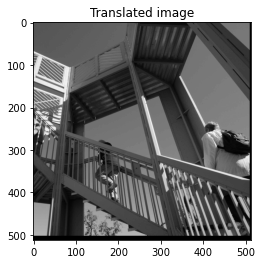

In [24]:
# part 2
translate = np.array([[1, 0, 3], [0, 1, 10], [0, 0, 1]])
tf = transform.AffineTransform(matrix=translate, scale=None, rotation=None, shear=None, translation=None)
image = transform.warp(f, tf, order=1, preserve_range=True, mode='constant')
imshow(image, cmap='gray')
plt.title("Translated image")

Text(0.5, 1.0, 'Rescaled and Rotated')

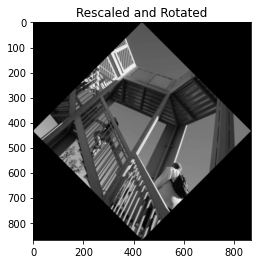

In [32]:
# part 3
tf = transform.rotate(f, -45, resize=True, mode='constant')
image = tf * 255
image = transform.rescale(image, 1.2, anti_aliasing=True)
imshow(image, cmap='gray')
plt.title("Rescaled and Rotated")

Text(0.5, 1.0, 'Cropped')

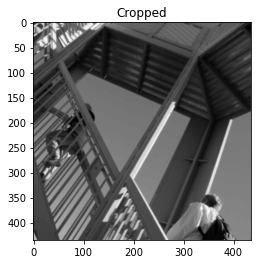

In [33]:
# part 3
h, w = image.shape
h_offset = h // 4
w_offset = h // 4
image = image[h_offset:-h_offset, w_offset:-w_offset]
imshow(image, cmap='gray')
plt.title("Cropped")

### Gamma correction and log contrast adjustment

C:\Users\Kevin\AppData\Local\Temp/ipykernel_7800/781592483.py:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes=np.zeros((2,3), dtype=np.object)


Text(0.5, 0, 'Pixel intensity')

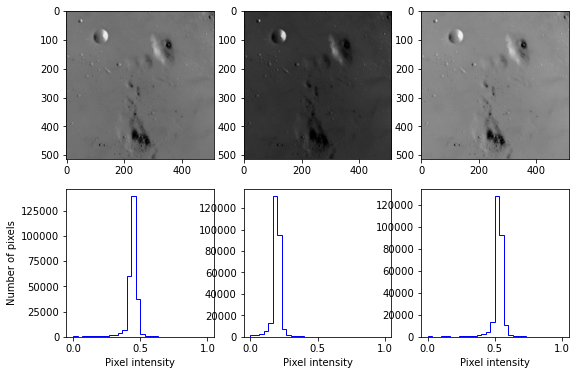

In [34]:
from skimage import data, img_as_float
from skimage import exposure

# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))
axes=np.zeros((2,3), dtype=np.object)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma corrected
gamma_corrected = exposure.adjust_gamma(im, 2)

# logarithmic corrected
logarithmic_corrected = exposure.adjust_log(im, 1)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')
#Display histogram for logarithmic-corrected image
ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')


### Question 2: 
1. Describe the effect of Gamma-correction on the distribution of pixel intensities.
2. How does logarithmic transformation improve the quality of an image?
3. Perform Gamma-transformation of the moon image with the value of  $\gamma$ < 1. What effect do you observe on pixel intensities of the original image? How is you result compared against Gamma-corrected pixel intensities obtained with $\gamma$=2?


<h4>Describe the effect of Gamma-correction on the distribution of pixel intensities.</h4>

Human eyes perceive light intensity different from camera lenses. Whereas cameras have a linear relationship between the amount of light received and the perceived intensity, the relationship is non-linear for our eyes. Gamma correction is used account for this difference using the following equation.
$$ O = I ^ {\frac{1}{\gamma}}$$
$$ O=Output, I=Input, \gamma=Gamma$$
Histogram is shifted left after the image is gamma corrected.

<h4>How does logarithmic transformation improve the quality of an image?</h4>
Logarithmic transform enhance images by spreading out darker pixels to a wider range of intensities.

<h4>Effect of different $\gamma$ values.</h4>
Gamma value < 1 shift histogram right and makes image brigher, gamma value > 1 shifts histogram left and makes image darker.

C:\Users\Kevin\AppData\Local\Temp/ipykernel_7800/1837641609.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes=np.zeros((2,3), dtype=np.object)


Text(0.5, 0, 'Pixel intensity')

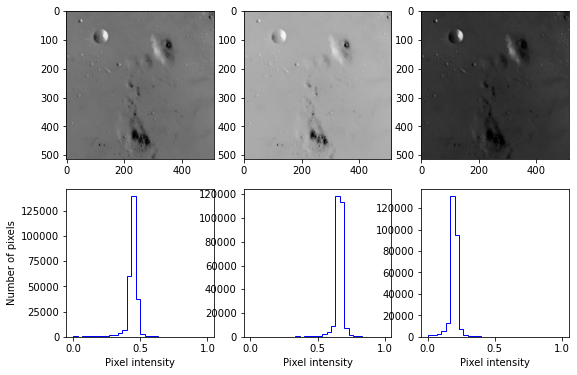

In [37]:
# Leave your answer here
fig=plt.figure(figsize=(9,6))
axes=np.zeros((2,3), dtype=np.object)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma = 0.5
gamma_half = exposure.adjust_gamma(im, 0.5)

# Gamma = 2
gamma_2 = exposure.adjust_gamma(im, 2)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_half, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_half.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(gamma_2, cmap='gray')
#Display histogram for logarithmic-corrected image
ax_hist[2].hist(gamma_2.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')